In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (12,8)
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, ConfusionMatrixDisplay


In [5]:
initial_dataset = pd.read_csv('/content/drive/MyDrive/CSE422/water_potability.csv')
initial_dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
initial_dataset.info()
print("---------------------")
"Dataset Shape:" ,initial_dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
---------------------


('Dataset Shape:', (3276, 10))

In [7]:
initial_dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

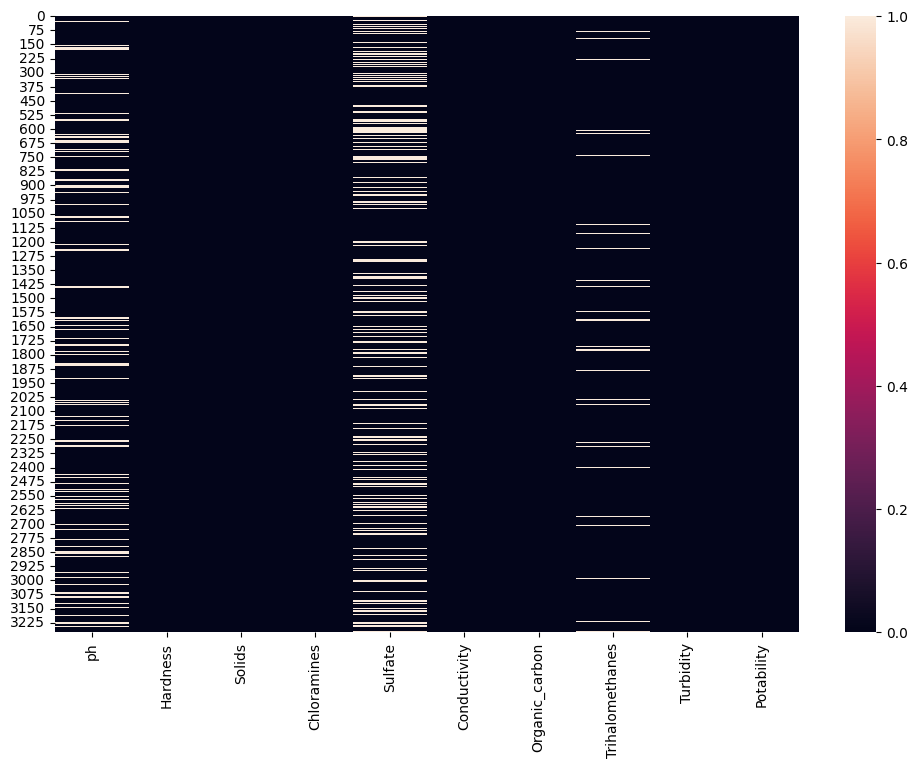

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(initial_dataset.isnull())

In [9]:

corr= initial_dataset.corr()
corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


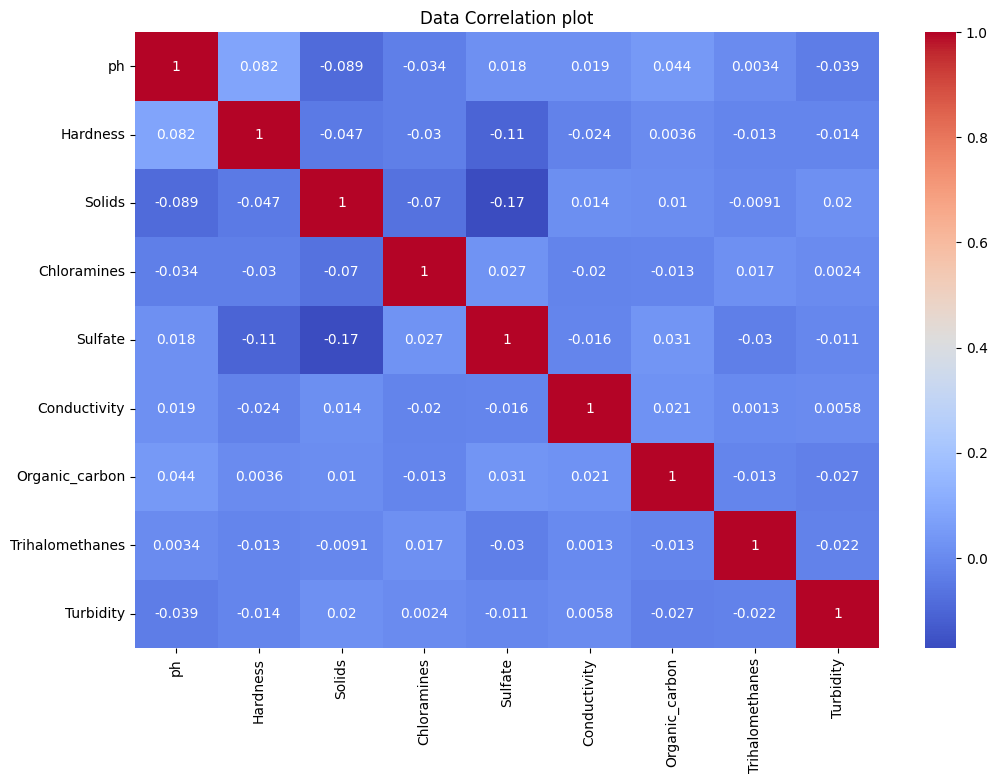

In [10]:
keep_features = initial_dataset.drop(initial_dataset.columns[-1],axis=1)
fig = plt.figure(figsize=(12, 8))
corr_plot = sns.heatmap(keep_features.corr(),annot = True, cmap = 'coolwarm' )
plt.title("Data Correlation plot")
plt.show()

In [11]:
sns.pairplot(initial_dataset)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
 ##imputing with mostfrequent values

impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

impute.fit(initial_dataset[['ph']])

initial_dataset['ph'] = impute.transform(initial_dataset[['ph']])

impute.fit(initial_dataset[['Sulfate']])

initial_dataset['Sulfate'] = impute.transform(initial_dataset[['Sulfate']])


impute.fit(initial_dataset[['Trihalomethanes']])

initial_dataset['Trihalomethanes'] = impute.transform(initial_dataset[['Trihalomethanes']])




In [13]:
initial_dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

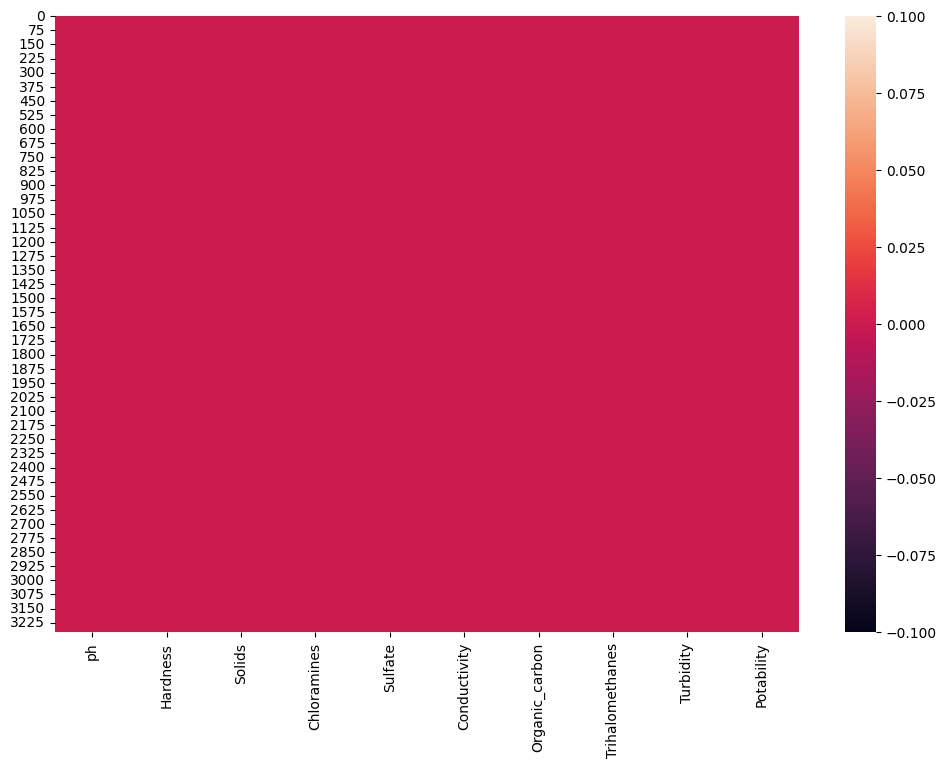

In [14]:
sns.heatmap(initial_dataset.isnull())

In [15]:
dataset= initial_dataset
dataset.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

Potability
0    1998
1    1278
Name: count, dtype: int64


<Axes: xlabel='Potability'>

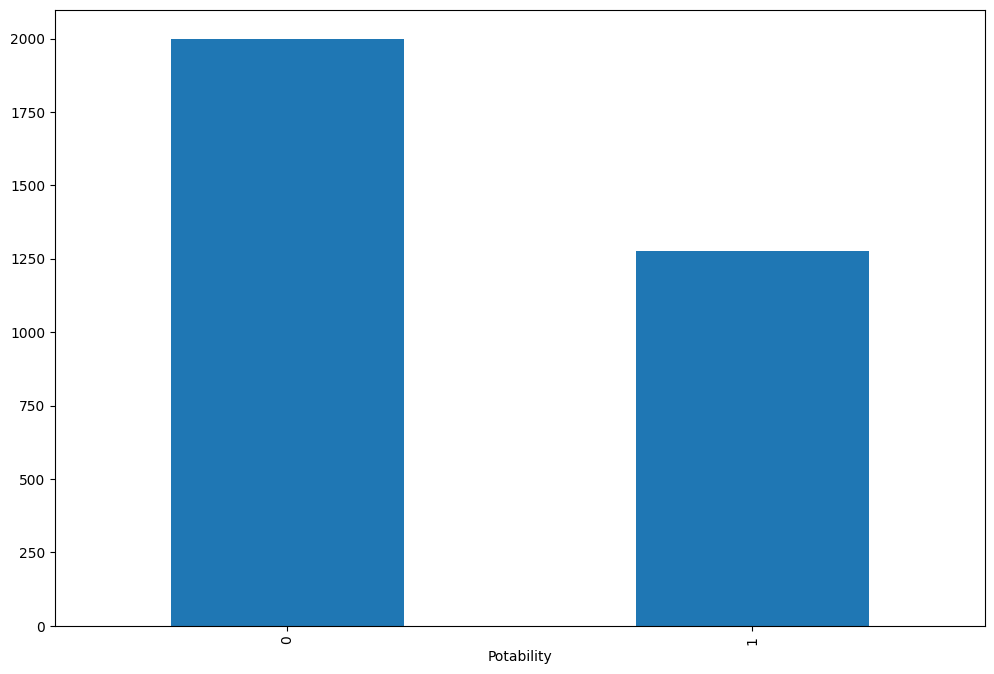

In [16]:
print(dataset["Potability"].value_counts())
dataset.groupby('Potability').size().plot(kind='bar', label="Type")


In [17]:
#uplsampling the minority class
notpotable  = initial_dataset[initial_dataset['Potability']==0]
potable = initial_dataset[initial_dataset['Potability']==1]


from sklearn.utils import resample
df_minority_upsampled = resample(potable, replace = True, n_samples = 1998)

from sklearn.utils import shuffle
initial_dataset = pd.concat([notpotable, df_minority_upsampled])
initial_dataset = shuffle(initial_dataset)
initial_dataset.shape
initial_dataset.Potability.value_counts()

Potability
1    1998
0    1998
Name: count, dtype: int64

Potability
1    1998
0    1998
Name: count, dtype: int64


<Axes: xlabel='Potability'>

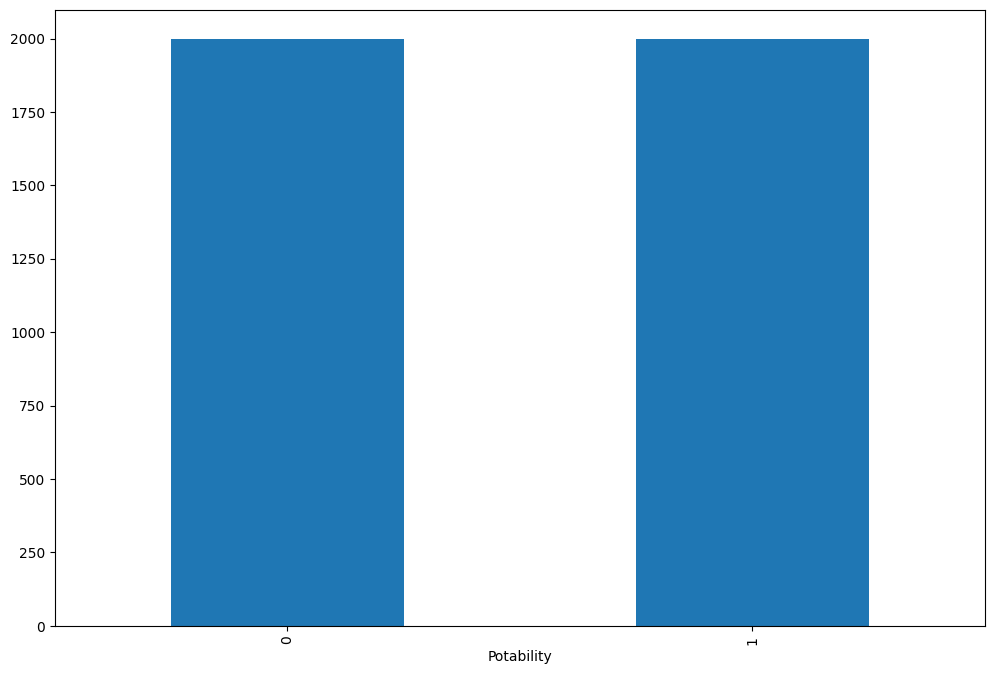

In [18]:
print(initial_dataset["Potability"].value_counts())

initial_dataset.groupby('Potability').size().plot(kind='bar',
                                       y = "potability",
                                       label = "Type",)

In [19]:
from sklearn.model_selection import train_test_split
x = initial_dataset.drop(['Potability'], axis = 1)
y = initial_dataset[['Potability']]

In [20]:
#Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x)
# transform data
x = scaler.transform(x)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
print(x.shape,x_train.shape,x_test.shape)

(3996, 9) (2797, 9) (1199, 9)


In [22]:
print("per-feature minimum after scaling:\n {}".format(
    x_train.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    x_train.max(axis=0)))

per-feature minimum after scaling:
 [0.         0.09655295 0.         0.         0.         0.03521146
 0.08321451 0.         0.        ]
per-feature maximum after scaling:
 [1.         1.         1.         1.         1.         1.
 1.         1.         0.95381897]


Accuracy: 0.6605504587155964
F1: 0.6407766990291263
Precision: 0.6836158192090396
Recall: 0.6029900332225914


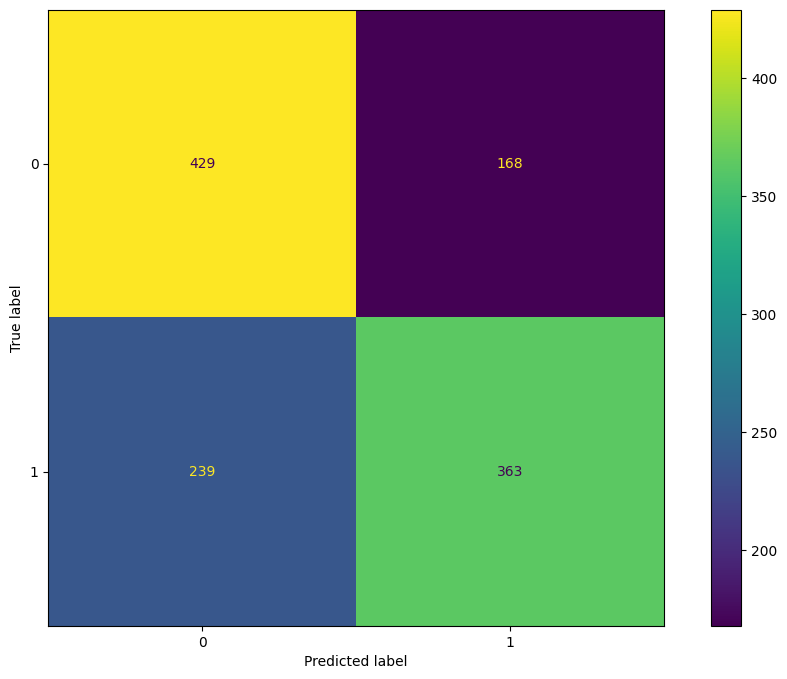

In [29]:
from sklearn import svm
# Create an SVM classifier
svm_classifier = svm.SVC()
svm_classifier.fit(x_train, y_train)

# Make predictions using the SVM classifier
y_pred_svm = svm_classifier.predict(x_test)

# Calculate accuracy
accuracySVM = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracySVM)
F1_score_svm=f1_score(y_test,y_pred_svm)
print("F1:", F1_score_svm)
# Calculate precision
precisionSVM = precision_score(y_test, y_pred_svm)
print('Precision:', precisionSVM)

# Calculate recall
recallSVM = recall_score(y_test, y_pred_svm)
print('Recall:', recallSVM)

# Create a confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm_classifier.classes_)

# Display confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_classifier.classes_)
disp_svm.plot()
plt.show()



Accuracy: 0.7272727272727273
F1: 0.755422587883321
Precision: 0.6870748299319728
Recall: 0.8388704318936877


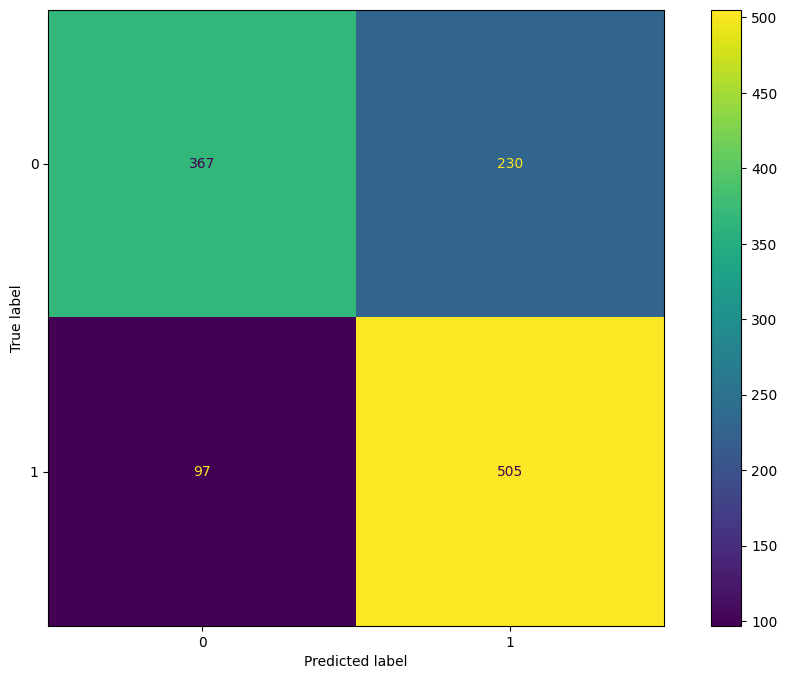

In [30]:
from sklearn.tree import DecisionTreeClassifier
# create a regressor object
regressorDT = DecisionTreeClassifier()

regressorDT.fit(x_train, y_train)

y_pred_DT = regressorDT.predict(x_test)


accuracyDT = accuracy_score(y_test, y_pred_DT)
print("Accuracy:", accuracyDT)
F1_score_dt=f1_score(y_test,y_pred_DT)
print("F1:", F1_score_dt)
precisionDT = precision_score(y_test, y_pred_DT)
print('Precision:', precisionDT)

recallDT = recall_score(y_test, y_pred_DT)
print('Recall:', recallDT)

cm = confusion_matrix(y_test, y_pred_DT, labels=regressorDT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=regressorDT.classes_)

disp.plot()
plt.show()

AccuracyKNN: 0.780650542118432
F1: 0.792094861660079
Precision: 0.755656108597285
Recall: 0.8322259136212624


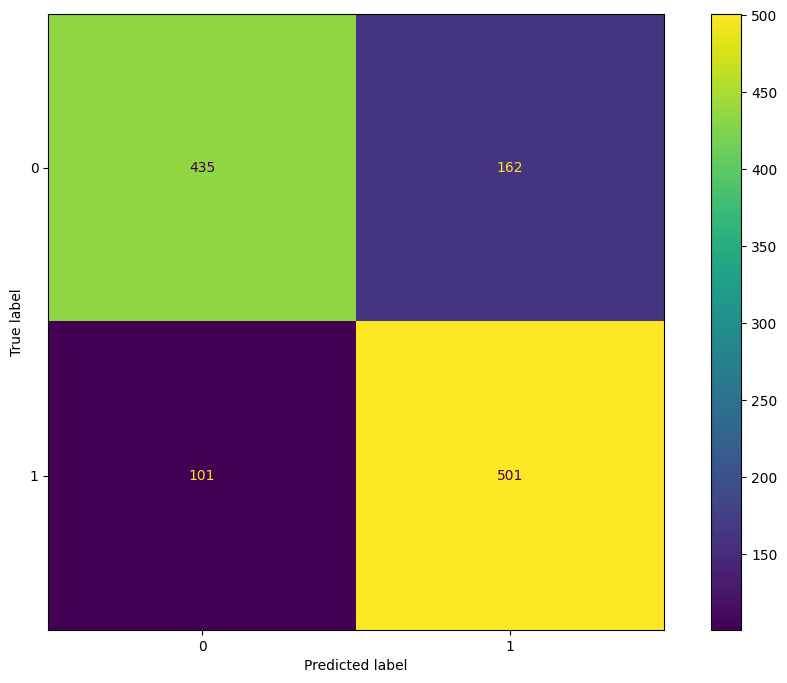

In [31]:
# Applying KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

accuracyKNN = accuracy_score(y_test, y_pred_knn)
print("AccuracyKNN:", accuracyKNN)
F1_score_KNN=f1_score(y_test,y_pred_knn)
print("F1:", F1_score_KNN)
precisionKNN = precision_score(y_test, y_pred_knn)
print('Precision:', precisionKNN)

recallKNN = recall_score(y_test, y_pred_knn)
print('Recall:', recallKNN)

cm = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

disp.plot()
plt.show()

AccuracyRandomForest: 0.8223519599666389
F1: 0.8190314358538658
PrecisionRandomForest: 0.8382608695652174
RecallRandomForest: 0.8006644518272426


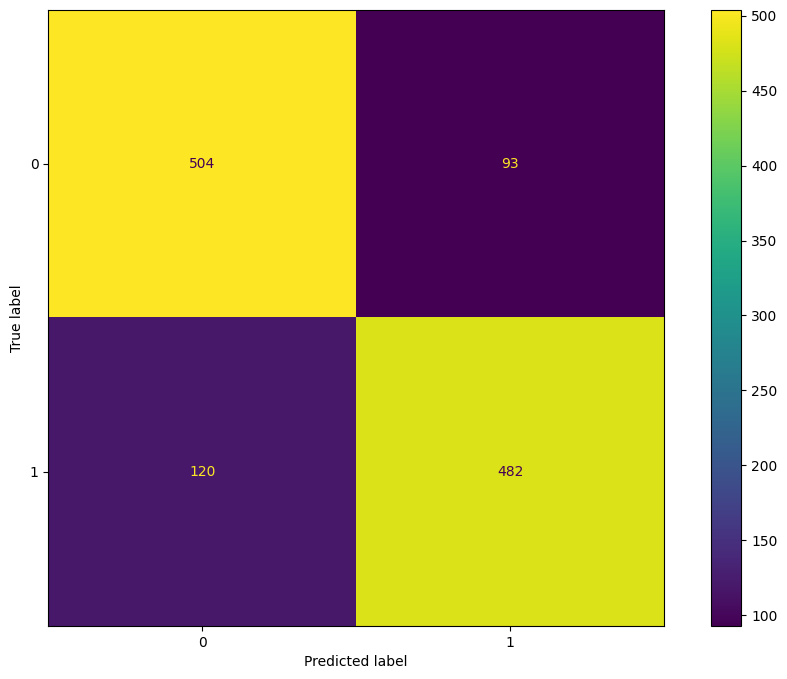

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, y_test are your training and testing data

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(x_test)

# Calculate and print performance metrics
accuracyRF = accuracy_score(y_test, y_pred_rf)
print("AccuracyRandomForest:", accuracyRF)

F1_score_RF=f1_score(y_test,y_pred_rf)
print("F1:", F1_score_RF)

precisionRF = precision_score(y_test, y_pred_rf)
print('PrecisionRandomForest:', precisionRF)

recallRF = recall_score(y_test, y_pred_rf)
print('RecallRandomForest:', recallRF)

# Plot confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=random_forest.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=random_forest.classes_)

disp_rf.plot()
plt.show()


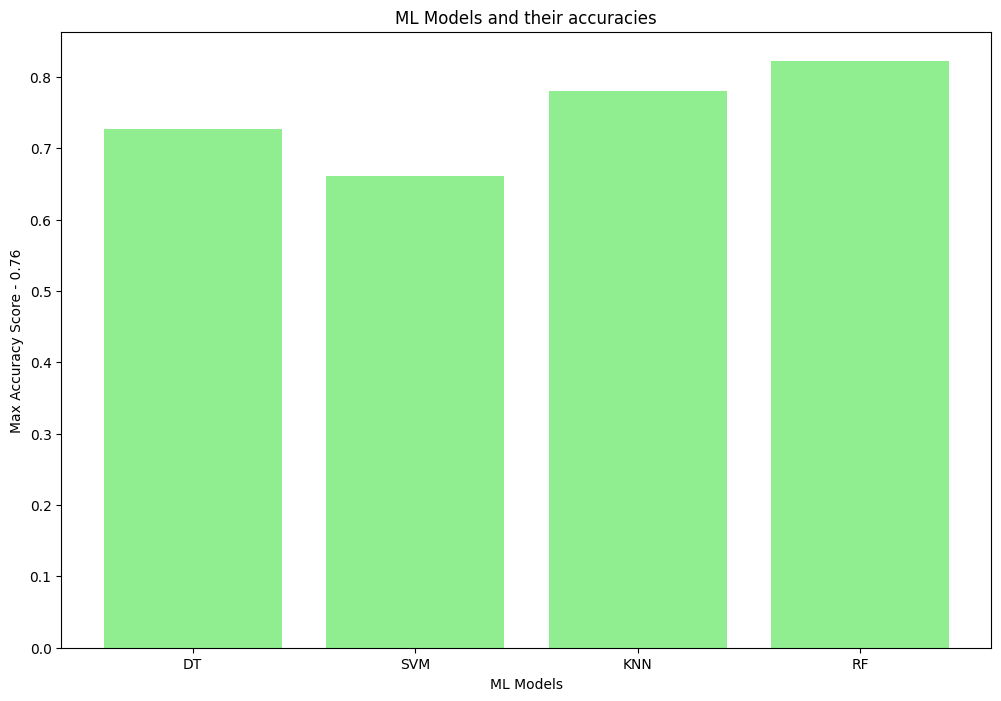

In [45]:
# plotting accuracy

import matplotlib.pyplot as plt

left = [1, 2, 3,4,]

tick_label = [ 'DT', 'SVM', 'KNN',"RF"]

height = [ accuracyDT , accuracySVM , accuracyKNN, accuracyRF]

score_list = ["accuracy", "precision", "recall","f1"]

# plotting a bar chart, scoring_list = score_list,
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = 'lightgreen')

# naming the x-axis
plt.xlabel('ML Models')
# naming the y-axis
plt.ylabel('Max Accuracy Score - 0.76')
# plot title
plt.title('ML Models and their accuracies')

# function to show the plot
plt.show()

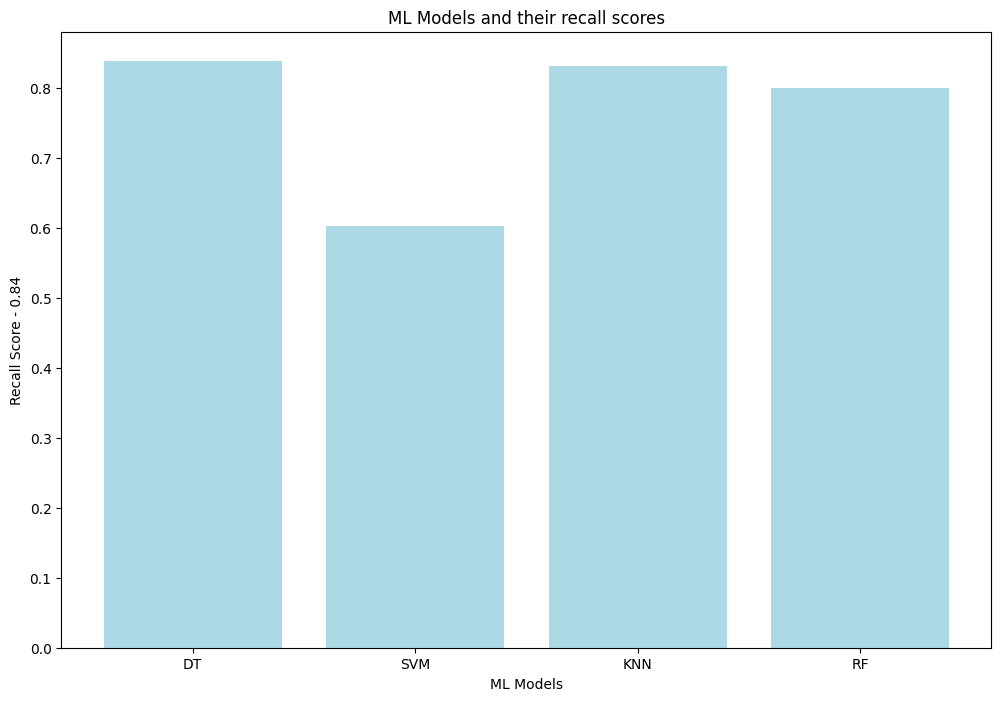

In [37]:
# plotting recall

import matplotlib.pyplot as plt

left = [1, 2, 3,4]

tick_label = ['DT', 'SVM', 'KNN',"RF"]

height = [recallDT , recallSVM, recallKNN, recallRF ]

score_list = ["accuracy", "precision", "recall","f1"]

# plotting a bar chart, scoring_list = score_list,
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = 'lightblue')

# naming the x-axis
plt.xlabel('ML Models')
# naming the y-axis
plt.ylabel('Recall Score - 0.84')
# plot title
plt.title('ML Models and their recall scores')

# function to show the plot
plt.show()

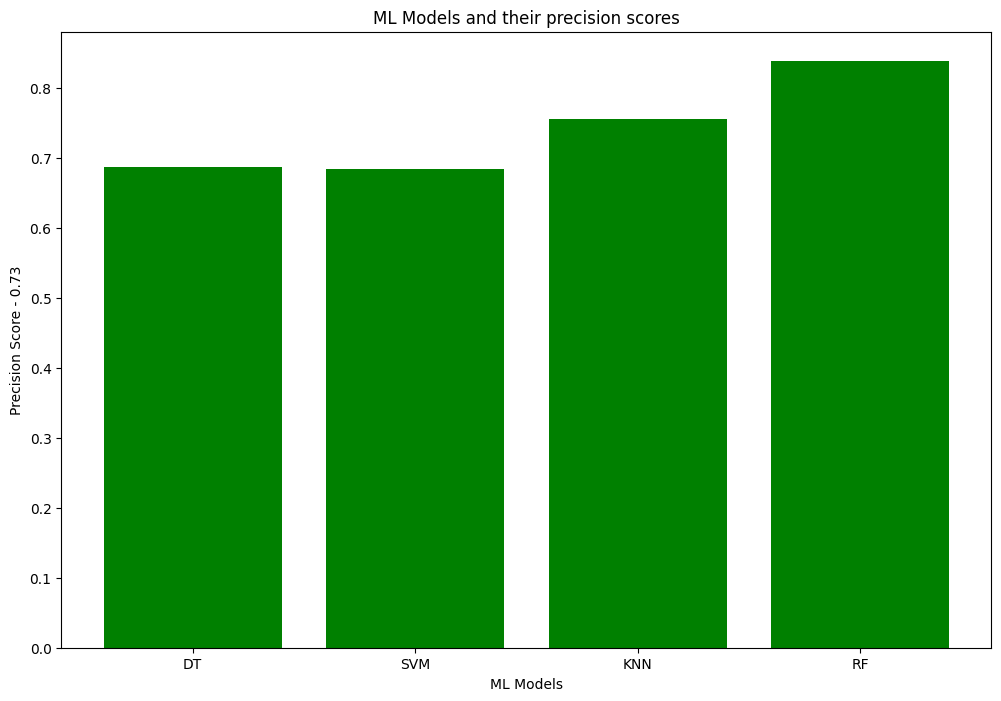

In [44]:
# plotting Precision

import matplotlib.pyplot as plt

left = [1, 2, 3,4]

tick_label = ['DT', 'SVM','KNN',"RF"]

height = [precisionDT , precisionSVM,  precisionKNN, precisionRF]

score_list = ["accuracy", "precision", "recall","f1"]

# plotting a bar chart, scoring_list = score_list,
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = 'green')

# naming the x-axis
plt.xlabel('ML Models')
# naming the y-axis
plt.ylabel('Precision Score - 0.73')
# plot title
plt.title('ML Models and their precision scores')

# function to show the plot
plt.show()

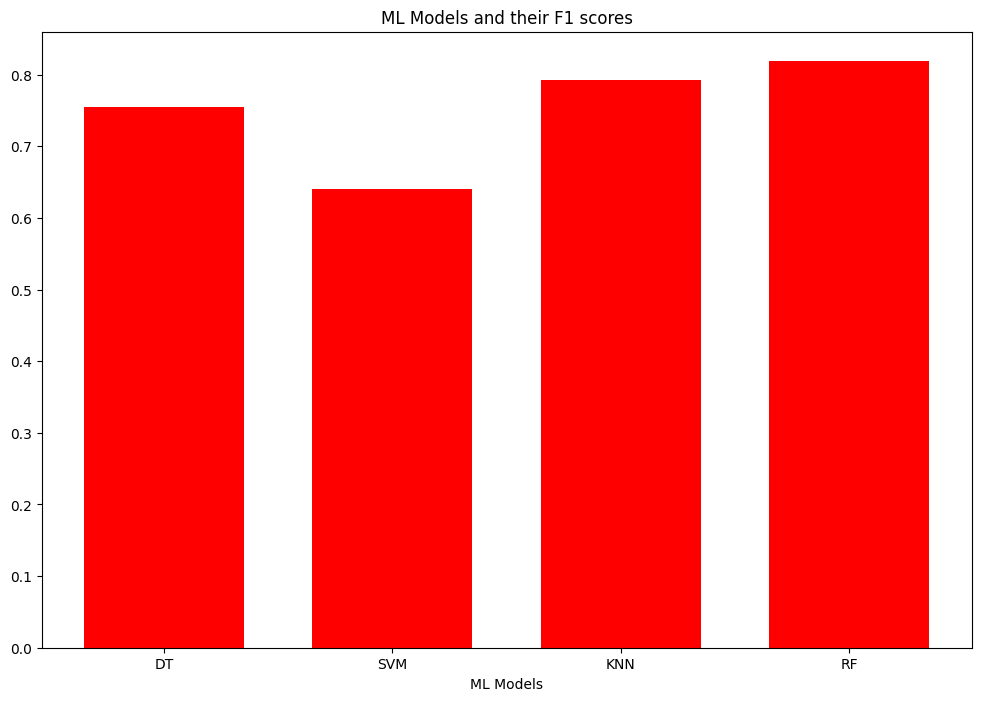

In [43]:
# plotting Precision

import matplotlib.pyplot as plt

left = [1, 2, 3,4]

tick_label = ['DT', 'SVM','KNN',"RF"]

height = [F1_score_dt,F1_score_svm,F1_score_KNN,F1_score_RF]

score_list = ["accuracy", "precision", "recall","f1"]

# plotting a bar chart, scoring_list = score_list,
plt.bar(left, height, tick_label = tick_label,
        width = 0.7, color = 'red')

# naming the x-axis
plt.xlabel('ML Models')
# naming the y-axis

# plot title
plt.title('ML Models and their F1 scores')

# function to show the plot
plt.show()